# Dátová analýza - Rozpoznávanie sentimentu z tweetov

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import re
from collections import Counter

pd.set_option('float_format', '{:f}'.format)

In [2]:
colnames = ['sent', 'id', 'date', 'query', 'name', 'tweet']
data = pd.read_csv('../data/raw/data.csv', encoding="ISO-8859-1", names=colnames, delimiter=',')

## Ukážka pôvodného datasetu

In [3]:
data.head()

,sent,id,date,query,name,tweet
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


Dataset má 1600000 záznamov a 6 stĺpcov. Hodnota sentimentu, id záznamu, dátum tweetu, query, meno autora, a tweet.

In [4]:
np.shape(data)

(1600000, 6)

## Analýza stĺpca sentiment

In [6]:
data['sent'].describe()

count   1600000.000000
mean          2.000000
std           2.000001
min           0.000000
25%           0.000000
50%           2.000000
75%           4.000000
max           4.000000
Name: sent, dtype: float64

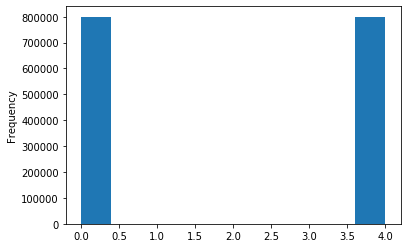

In [7]:
data['sent'].plot(kind='hist')

Stĺpec sent má len 2 hodnoty. 0 - negatívny sentiment a 4 - pozitívny sentiment.

In [6]:
data['sent'].unique()

array([0, 4])

## Analýza stĺpca id

In [7]:
data['id'].describe()

count      1600000.000000
mean    1998817552.295628
std      193576073.622676
min     1467810369.000000
25%     1956915818.000000
50%     2002101855.000000
75%     2177059128.750000
max     2329205794.000000
Name: id, dtype: float64

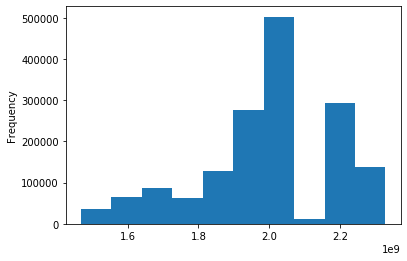

In [8]:
data['id'].plot(kind='hist')

## Analýza stĺpca dátum

In [8]:
data['date'].describe()

count                          1600000
unique                          774363
top       Mon Jun 15 12:53:14 PDT 2009
freq                                20
Name: date, dtype: object

## Analýza stĺpca query

In [9]:
data['query'].describe()

count      1600000
unique           1
top       NO_QUERY
freq       1600000
Name: query, dtype: object

In [10]:
data['query'].unique()

array(['NO_QUERY'], dtype=object)

## Analýza stĺpca meno

In [11]:
data['name'].describe()

count      1600000
unique      659775
top       lost_dog
freq           549
Name: name, dtype: object

## Analýza stĺpca tweet

In [12]:
data['tweet'].describe()

count                       1600000
unique                      1581466
top       isPlayer Has Died! Sorry 
freq                            210
Name: tweet, dtype: object

### Štatistika počtu slov 

In [11]:
data['word_count'] = data['tweet'].str.split().str.len()

In [12]:
data['word_count'].describe()

count   1600000.000000
mean         13.176151
std           6.957978
min           1.000000
25%           7.000000
50%          12.000000
75%          19.000000
max          64.000000
Name: word_count, dtype: float64

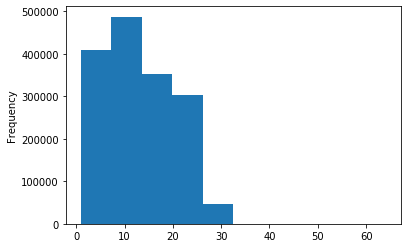

In [13]:
data['word_count'].plot(kind='hist')

In [7]:
data['words'] = data['tweet'].str.split()

In [16]:
data['words']

0          [@switchfoot, http://twitpic.com/2y1zl, -, Aww...
1          [is, upset, that, he, can't, update, his, Face...
2          [@Kenichan, I, dived, many, times, for, the, b...
3          [my, whole, body, feels, itchy, and, like, its...
4          [@nationwideclass, no,, it's, not, behaving, a...
                                 ...                        
1599995    [Just, woke, up., Having, no, school, is, the,...
1599996    [TheWDB.com, -, Very, cool, to, hear, old, Wal...
1599997    [Are, you, ready, for, your, MoJo, Makeover?, ...
1599998    [Happy, 38th, Birthday, to, my, boo, of, alll,...
1599999    [happy, #charitytuesday, @theNSPCC, @SparksCha...
Name: words, Length: 1600000, dtype: object

### Najbežnejšie slová pre negatívny sentiment

In [3]:
Counter(re.findall('\w{3,}',' '.join(data['tweet'].head(800000)).lower())).most_common(100)

[('the', 257869),
 ('and', 153968),
 ('you', 103842),
 ('for', 98986),
 ('but', 84912),
 ('have', 82867),
 ('that', 82821),
 ('not', 75051),
 ('just', 64013),
 ('was', 59292),
 ('this', 52994),
 ('now', 52613),
 ('can', 52141),
 ('with', 50153),
 ('get', 45542),
 ('work', 45455),
 ('out', 43858),
 ('all', 42147),
 ('like', 41048),
 ('day', 39858),
 ('today', 38115),
 ('too', 37551),
 ('are', 34021),
 ('going', 33685),
 ('got', 33289),
 ('back', 33076),
 ('don', 32837),
 ('really', 31497),
 ('miss', 30712),
 ('want', 29864),
 ('what', 29314),
 ('still', 29264),
 ('good', 29207),
 ('from', 28017),
 ('sad', 27917),
 ('had', 27802),
 ('time', 27516),
 ('one', 27257),
 ('know', 26310),
 ('quot', 26176),
 ('about', 26170),
 ('its', 25523),
 ('they', 25023),
 ('home', 24560),
 ('http', 24360),
 ('there', 23909),
 ('lol', 23135),
 ('will', 22947),
 ('amp', 22486),
 ('last', 22462),
 ('wish', 22461),
 ('when', 22338),
 ('need', 22299),
 ('feel', 21957),
 ('think', 21877),
 ('bad', 21721),
 ('wh

### Najbežnejšie slová pre pozitívny sentiment

In [4]:
Counter(re.findall('\w{3,}',' '.join(data['tweet'].tail(800000)).lower())).most_common(100)

[('the', 266003),
 ('you', 198194),
 ('and', 149635),
 ('for', 117362),
 ('that', 83089),
 ('with', 65177),
 ('just', 62946),
 ('have', 62744),
 ('good', 62121),
 ('but', 48600),
 ('love', 47696),
 ('http', 47217),
 ('day', 47200),
 ('quot', 45931),
 ('was', 45359),
 ('your', 44558),
 ('are', 44072),
 ('this', 41566),
 ('all', 41416),
 ('now', 41375),
 ('can', 41351),
 ('out', 38381),
 ('like', 37519),
 ('get', 36502),
 ('lol', 36134),
 ('com', 35464),
 ('thanks', 34526),
 ('not', 33638),
 ('going', 30932),
 ('time', 30429),
 ('today', 30095),
 ('what', 30035),
 ('will', 29478),
 ('too', 28227),
 ('from', 28158),
 ('got', 28007),
 ('new', 26952),
 ('one', 26675),
 ('some', 26600),
 ('amp', 26288),
 ('see', 25806),
 ('know', 25733),
 ('great', 25309),
 ('about', 24334),
 ('back', 23858),
 ('night', 23563),
 ('how', 23390),
 ('well', 23294),
 ('haha', 21667),
 ('there', 21327),
 ('morning', 20832),
 ('happy', 20533),
 ('had', 20336),
 ('twitter', 19911),
 ('work', 19545),
 ('think', 1952

In [8]:
data

,sent,id,date,query,name,tweet,word_count,words
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",19,"[@switchfoot, http://twitpic.com/2y1zl, -, Aww..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...,21,"[is, upset, that, he, can't, update, his, Face..."
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...,18,"[@Kenichan, I, dived, many, times, for, the, b..."
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire,10,"[my, whole, body, feels, itchy, and, like, its..."
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all....",21,"[@nationwideclass, no,, it's, not, behaving, a..."
...,...,...,...,...,...,...,...,...
1599995,4,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...,11,"[Just, woke, up., Having, no, school, is, the,..."
1599996,4,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...,11,"[TheWDB.com, -, Very, cool, to, hear, old, Wal..."
1599997,4,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...,11,"[Are, you, ready, for, your, MoJo, Makeover?, ..."
1599998,4,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...,12,"[Happy, 38th, Birthday, to, my, boo, of, alll,..."


# Predspracovanie dát


1. Z pôvodného datasetu som odstránil stĺpce id, date, query a name a vybral z neho 30000 riadkov pre tréning a 100000 riadkov pre testovanie
2. Hodnotu 4 v stĺpci sent som zmenil na 1
3. Z tweetow som odstránil tagované mená (začínajú na @), linky a hashtagy
4. Skrátené výrazy som transformoval na ich dlhý tvar it's -> it is, isn't -> is not, I'm -> I am, I'd -> I would, I've -> I have a podobne)
5. Odstranil som pozostatkové emotikony
6. Skratky ako lol a idk som transformoval na laugh a I do not know
7. Odstránil som znaky ? ! . '
8. Znak '$' som nahradil slovom dollar
9. Odstránil som viacnásobné medzery